In [459]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [460]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Lendo e analisando o formato dos dados

In [461]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [462]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [463]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Tirando as colunas que contém pouca interferência e passando os dados de nominais para numéricos : 

In [464]:
import warnings
warnings.filterwarnings('ignore')

In [465]:
col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data = data.loc[:, ~data.columns.isin(col)]

In [466]:
data.loc[:, 'Sex'] = data.loc[:, 'Sex'].replace({'male' : 1, 'female' : 0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [467]:
from sklearn.preprocessing import OneHotEncoder

encoded_df = pd.get_dummies(data[['Pclass', 'Embarked']], columns=['Pclass', 'Embarked']).astype(int)

print(encoded_df.value_counts())

Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0         0         1         0           0           1             353
          1         0         0           0           1             164
1         0         0         0           0           1             127
                              1           0           0              85
0         0         1         0           1           0              72
                              1           0           0              66
          1         0         1           0           0              17
                              0           1           0               3
1         0         0         0           0           0               2
                                          1           0               2
Name: count, dtype: int64


In [468]:
data.drop(columns = ['Pclass', 'Embarked'], inplace = True)
data = pd.concat([data, encoded_df], axis = 1)
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


#### Preenchendo os valores NaN com o algoritmo KNN Imputer, usando o MinMax para normalizar os dados :

In [469]:
data.isna().sum()

Survived        0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [470]:
data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1


In [471]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)
data = data.astype(float)
data.isna().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [472]:
data.isna().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [473]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(data.loc[:, ~data.columns.isin(['Survived'])])
y = data.loc[:, 'Survived']

In [474]:
data_norm = pd.DataFrame(np.column_stack((y, x)), columns=data.columns)

data_norm.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0


#### Criando os modelos de classificação que irão atuar sobre os dados de treino : 

In [475]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp_with_adam = MLPClassifier(activation = 'tanh', 
                    solver = 'adam', max_iter = 800)


n_neurons = [
    (25, 3), (20, 1), # Configurações de duas camadas
    (30, 20, 1), (10, 10, 1), (5, 4, 3), (100, 10, 1), 
    (100, 100, 50, 10, 2, 1)  # Configurações de três camadas
]

parameters = {'hidden_layer_sizes': n_neurons}

mlp_adam_clf = GridSearchCV(estimator = mlp_with_adam, param_grid = parameters, cv = 10, scoring='accuracy')
mlp_adam_clf.fit(x, y)

bparam_adam = mlp_adam_clf.best_params_['hidden_layer_sizes']
print(f"The best param is {bparam_adam} and the accuracy is : {mlp_adam_clf.best_score_}")

The best param is (30, 20, 1) and the accuracy is : 0.8047315855181024


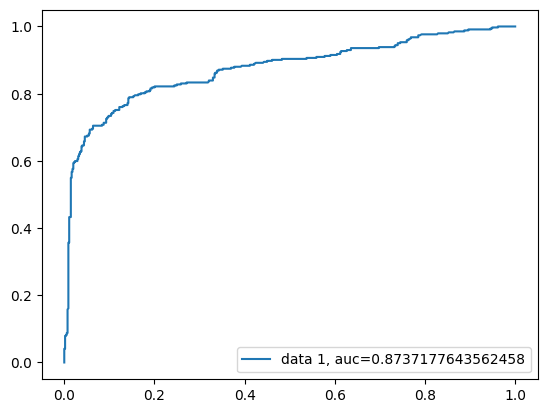

0.8737177643562458
CPU times: user 1.41 s, sys: 644 ms, total: 2.05 s
Wall time: 1.26 s


In [476]:
%%time

from sklearn.metrics import roc_auc_score


mlp_adam = MLPClassifier(hidden_layer_sizes=bparam_adam, activation = 'tanh', 
                         solver = 'adam', max_iter = 800).fit(x, y)

y_pred_proba_adam = mlp_adam.predict_proba(x)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y,  y_pred_proba_adam)
auc = metrics.roc_auc_score(y, y_pred_proba_adam)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(auc)

In [477]:
mlp_with_sgd = MLPClassifier(activation = 'tanh', 
                             solver = 'sgd', max_iter = 800)


n_neurons = [
    (25, 3), (20, 1), # Configurações de duas camadas
    (30, 20, 1), (10, 10, 1), (5, 4, 3), (100, 10, 1), 
    (100, 100, 50, 10, 2, 1)  # Configurações de três camadas
]

parameters = {'hidden_layer_sizes': n_neurons}

mlp_sgd_clf = GridSearchCV(estimator = mlp_with_sgd, param_grid = parameters, cv = 10, scoring='accuracy')
mlp_sgd_clf.fit(x, y)

bparam_sgd = mlp_sgd_clf.best_params_['hidden_layer_sizes']
print(f"The best param is {bparam_sgd} and the accuracy is : {mlp_sgd_clf.best_score_}")

The best param is (30, 20, 1) and the accuracy is : 0.8148314606741573


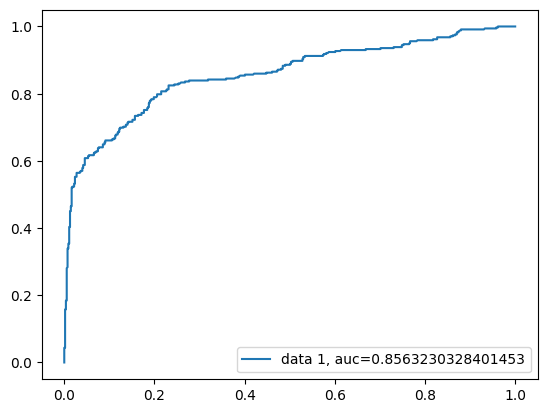

0.8563230328401453
CPU times: user 1.02 s, sys: 595 ms, total: 1.62 s
Wall time: 817 ms


In [478]:
%%time

mlp_sgd = MLPClassifier(hidden_layer_sizes = bparam_sgd, activation = 'tanh', 
                    solver = 'sgd', max_iter = 800).fit(x, y)

y_pred_proba_sgd = mlp_sgd.predict_proba(x)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y,  y_pred_proba_sgd)
auc = metrics.roc_auc_score(y, y_pred_proba_sgd)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(auc)

#### Criando o KNN classifier : 

In [479]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

n_neighbors = np.arange(start = 1, stop = 25, step = 1)
parameters = {'n_neighbors': n_neighbors}

knn_clf = GridSearchCV(estimator = neigh, param_grid = parameters, cv = 10)
knn_clf.fit(x, y)
bparam_knn = knn_clf.best_params_['n_neighbors']
print(f"The best param is {bparam_knn} and the accuracy is : {knn_clf.best_score_}")

The best param is 3 and the accuracy is : 0.8182022471910113


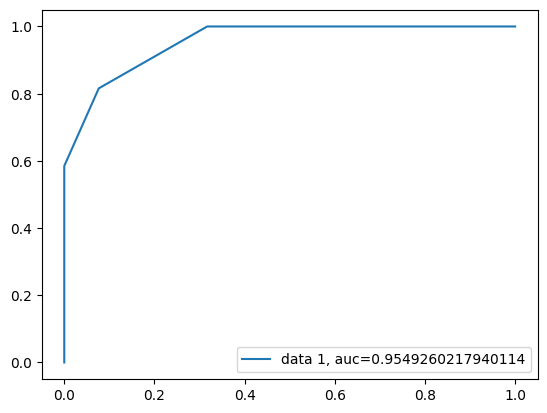

0.9549260217940114
CPU times: user 108 ms, sys: 95.9 ms, total: 204 ms
Wall time: 82.5 ms


In [480]:
%%time

knn_blam = KNeighborsClassifier(n_neighbors = bparam_knn).fit(x, y)

y_pred_proba_knn = knn_blam.predict_proba(x)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y,  y_pred_proba_knn)
auc = metrics.roc_auc_score(y, y_pred_proba_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(auc)

#### Criando o Bayesian classifier : 

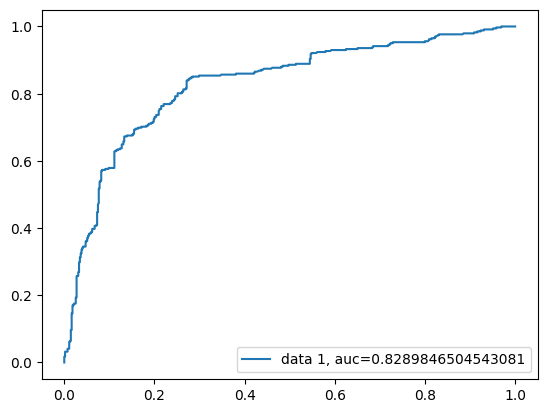

0.8289846504543081
CPU times: user 144 ms, sys: 168 ms, total: 312 ms
Wall time: 104 ms


In [481]:
%%time

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
bay = GaussianNB().fit(x, y)
np.mean(cross_val_score(bay, x, y, cv=10))
y_pred_proba_bay = bay.predict_proba(x)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y,  y_pred_proba_bay)
auc = metrics.roc_auc_score(y, y_pred_proba_bay)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print(auc)

#### Modificando os dados de teste para o modelo prever: 

In [482]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [483]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [484]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [485]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [486]:
PassengerId = test['PassengerId']
col = ['PassengerId', 'Name', 'Ticket', 'Cabin']
test = test.loc[:, ~test.columns.isin(col)]

In [487]:
test.loc[:, 'Sex'] = test.loc[:, 'Sex'].replace({'male' : 1, 'female' : 0})
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [488]:
from sklearn.preprocessing import OneHotEncoder

encoded_df = pd.get_dummies(test[['Pclass', 'Embarked']], columns=['Pclass', 'Embarked']).astype(int)

print(encoded_df.value_counts())

Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S
0         0         1         0           0           1             142
          1         0         0           0           1              78
1         0         0         1           0           0              56
                              0           0           1              50
0         0         1         0           1           0              41
                              1           0           0              35
          1         0         1           0           0              11
                              0           1           0               4
1         0         0         0           1           0               1
Name: count, dtype: int64


In [489]:
test.drop(columns = ['Pclass', 'Embarked'], inplace = True)
test = pd.concat([test, encoded_df], axis = 1)
test.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,34.5,0,0,7.8292,0,0,1,0,1,0
1,0,47.0,1,0,7.0000,0,0,1,0,0,1
2,1,62.0,0,0,9.6875,0,1,0,0,1,0
3,1,27.0,0,0,8.6625,0,0,1,0,0,1
4,0,22.0,1,1,12.2875,0,0,1,0,0,1


#### Usando o KNN imputer : 

In [490]:
imputer = KNNImputer(n_neighbors = 5)
test = pd.DataFrame(imputer.fit_transform(test), columns = test.columns)
test = test.astype(float)
test.isna().sum()

Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

#### Usando MinMax scaler para modificar os dados : 

In [491]:
scaler = MinMaxScaler()
test_norm = scaler.fit_transform(test)

test_norm = pd.DataFrame(test_norm, columns=test.columns)
test_norm.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,1.0


In [492]:
pred = knn_blam.predict(test)
pred_arr = np.column_stack((PassengerId, pred))

# Create the DataFrame
predictions_df = pd.DataFrame(pred_arr, columns=['PassengerId', 'Survived']).astype(int)
predictions_df.to_csv('predictions.csv', index=False)

In [493]:
pred = pd.read_csv('predictions.csv')
pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [494]:
pred['Survived'].value_counts()

Survived
0    210
1    208
Name: count, dtype: int64

In [495]:
pred = mlp_adam.predict(test)
np.unique(pred, return_counts=True)

(array([0.]), array([418]))

In [496]:
pred = mlp_sgd.predict(test)
np.unique(pred, return_counts=True)

(array([0.]), array([418]))